In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model

In [3]:
import cv2
from mtcnn import MTCNN

In [4]:
pip install git+https://github.com/rcmalli/keras-vggface.git

  Running command git clone -q https://github.com/rcmalli/keras-vggface.git 'C:\Users\shakt\AppData\Local\Temp\pip-req-build-xt58a20k'


  Cloning https://github.com/rcmalli/keras-vggface.git to c:\users\shakt\appdata\local\temp\pip-req-build-xt58a20k


In [5]:
pip install git+https://github.com/cehorn/GLRM.git

  Cloning https://github.com/cehorn/GLRM.git to c:\users\shakt\appdata\local\temp\pip-req-build-mzntpaix
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/cehorn/GLRM.git 'C:\Users\shakt\AppData\Local\Temp\pip-req-build-mzntpaix'


In [6]:
from tensorflow.keras.layers import Layer, InputSpec
import tensorflow.python.keras.engine

In [8]:
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

In [9]:
from model import get_model

In [10]:
model = get_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [71]:
def crop_face(filename, required_size=(224, 224)):
    img = cv2.imread(filename)
    detector = MTCNN()
    results = detector.detect_faces(img)
    print(results)
    x, y, width, height = results[0]['box']
    face = img[y:y+height, x:x+width]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
#     print("face",face)
#     print("Face_array",face_array)
#     print("face_array shape",face_array.shape)
    return face_array, face

In [149]:
def who_is_this(img, vgg_face_descriptor):
    face_array, face = crop_face(img)
    face_array = face_array.astype('float32')
    input_sample = np.expand_dims(face_array, axis=0)
    img_prediction = vgg_face_descriptor.predict(preprocess_input(input_sample))
#     xa = img_prediction[0]
#     xa = xa.reshape(-1, 1)
#     min_max_scaler = preprocessing.MinMaxScaler()
#     xa = min_max_scaler.fit_transform(xa)
#     xa = xa.reshape((2622,))
#     img_prediction[0] = xa
#     results = decode_predictions(img_prediction)
#     print(results)

    results = decode_predictions(img_prediction)
    prediction = results[0][0][0].replace("b'", "").replace("'","")
    nm.append(prediction)
    val.append(results[0][0][1])
    if results[0][0][1] < 10:
        prediction = "Face not found"
#     print("input_sample",input_sample)
#     print("img_prediction",img_prediction)
    print("-------------------------------------------------")
    print("resuls",results)
    return prediction

In [150]:
from sklearn import preprocessing

In [151]:
def get_prediction(image_path):
    model.load_weights(os.path.join(os.getcwd(), "weights", "vgg_face_weights.h5"))
    vgg_face_descriptor = Model(inputs=model.layers[0].input,\
                                outputs=model.layers[-2].output)
    print("descriptor",vgg_face_descriptor)
#     print(type(vgg_face_descriptor))
#     print(dir(vgg_face_descriptor))
    return who_is_this(image_path, vgg_face_descriptor)


In [152]:
import seaborn as sns
import matplotlib.pyplot as plt


In [155]:
if __name__ == "__main__":
    lst = ['Snoop_Dogg', 'Taylor_Swift','Katy_Perry','Joey_King','Akshay_Kumar','John_Abraham','Tim_Pocock','Luke_Wilson','Adam_Levine','Adam_Garcia','Tim_Russ','John_Terry']
    arr = []
    nm = []
    val = []
    a=0
    for i in range(len(lst)):
        print(i)
        if get_prediction('C:\\Users\\shakt\\Desktop\\testdata\\adam_garcia\\'+str(i+1)+'.jpg') == lst[i]:
            arr.append(1)
            
            a+=1
        else:
            arr.append(0)
        
    print(arr)
    print(nm)
    print(val)
    print("accuracy:", a/len(arr))
        
    print(get_prediction('C:\\Users\\shakt\\Desktop\\testdata\\adam_garcia\\1.jpg'))

0
descriptor <keras.engine.functional.Functional object at 0x000002802B046F70>
[{'box': [222, 162, 489, 611], 'confidence': 0.9994869232177734, 'keypoints': {'left_eye': (416, 381), 'right_eye': (635, 388), 'nose': (567, 484), 'mouth_left': (429, 624), 'mouth_right': (612, 630)}}]
-------------------------------------------------
resuls [[["b'Snoop_Dogg'", 18.898455], ["b'Eamonn_Walker'", 10.564778], ["b'Katt_Williams'", 10.027606], ["b'Billy_Dee_Williams'", 9.815744], ["b'Jeffrey_Wright'", 9.257688]]]
1
descriptor <keras.engine.functional.Functional object at 0x0000028091A77B20>
[{'box': [230, 165, 348, 443], 'confidence': 0.995890736579895, 'keypoints': {'left_eye': (341, 342), 'right_eye': (504, 332), 'nose': (436, 420), 'mouth_left': (364, 509), 'mouth_right': (497, 500)}}]
-------------------------------------------------
resuls [[["b'Taylor_Swift'", 21.846882], ["b'Izabella_Scorupco'", 13.686166], ["b'Hannah_Spearritt'", 13.5892515], ["b'Diora_Baird'", 12.308874], ["b'MyAnna_Buri

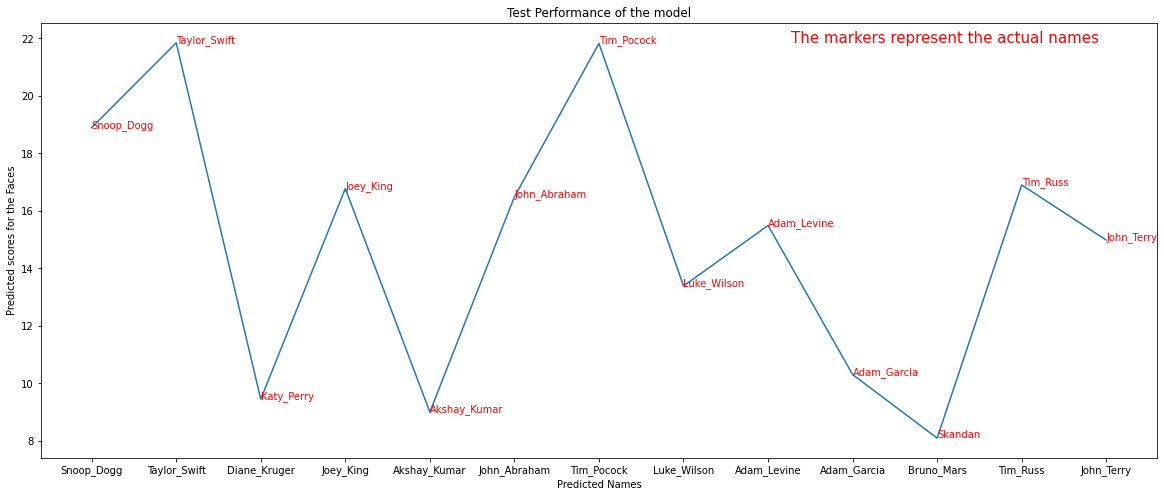

In [154]:
plt.figure(figsize=(20,8))
plt.title("Test Performance of the model")
plt.xlabel("Predicted Names")
plt.ylabel("Predicted scores for the Faces")
sns.lineplot(x = nm,y = val,markers='g^')
plt.annotate('The markers represent the actual names', xy=(0, 1), xytext=(750, -20), va='baseline',xycoords='axes fraction', textcoords='offset points',color='r',fontsize = 15)
for x, y in zip(nm,val):
#     print(x,y)
    plt.text(x = x,y = y,s = ''+lst[nm.index(x)].format(y),color = 'r')



# This is for a single value viewing preprocessed data entering the model (for understanding)

In [156]:
def who_is_this2(img, vgg_face_descriptor):
    face_array, face = crop_face(img)
    face_array = face_array.astype('float32')
    input_sample = np.expand_dims(face_array, axis=0)
    img_prediction = vgg_face_descriptor.predict(preprocess_input(input_sample))
#     xa = img_prediction[0]
#     xa = xa.reshape(-1, 1)
#     min_max_scaler = preprocessing.MinMaxScaler()
#     xa = min_max_scaler.fit_transform(xa)
#     xa = xa.reshape((2622,))
#     img_prediction[0] = xa
#     results = decode_predictions(img_prediction)
#     print(results
    print(input_sample)
    print(preprocess_input(input_sample))
    print("img_prediction",img_prediction)
    results = decode_predictions(img_prediction)
    prediction = results[0][0][0].replace("b'", "").replace("'","")
    nm.append(prediction)
    val.append(results[0][0][1])
    if results[0][0][1] < 10:
        prediction = "Face not found"
#     print("input_sample",input_sample)
#     print("img_prediction",img_prediction)
    print("-------------------------------------------------")
    print("resuls",results)
    return prediction

In [157]:
def get_prediction(image_path):
    model.load_weights(os.path.join(os.getcwd(), "weights", "vgg_face_weights.h5"))
    vgg_face_descriptor = Model(inputs=model.layers[0].input,\
                                outputs=model.layers[-2].output)
    print("descriptor",vgg_face_descriptor)
#     print(type(vgg_face_descriptor))
#     print(dir(vgg_face_descriptor))
    return who_is_this2(image_path, vgg_face_descriptor)


In [158]:
if __name__ == "__main__":
        
    print(get_prediction('C:\\Users\\shakt\\Desktop\\testdata\\adam_garcia\\1.jpg'))

descriptor <keras.engine.functional.Functional object at 0x0000028095882D90>
[{'box': [222, 162, 489, 611], 'confidence': 0.9994869232177734, 'keypoints': {'left_eye': (416, 381), 'right_eye': (635, 388), 'nose': (567, 484), 'mouth_left': (429, 624), 'mouth_right': (612, 630)}}]
[[[[ 73.  65.  69.]
   [ 97.  95.  98.]
   [ 36.  37.  38.]
   ...
   [231. 194. 166.]
   [231. 195. 164.]
   [232. 197. 164.]]

  [[ 87.  80.  81.]
   [114. 112. 114.]
   [ 62.  63.  64.]
   ...
   [231. 194. 166.]
   [232. 196. 165.]
   [232. 197. 164.]]

  [[ 83.  80.  80.]
   [ 83.  84.  86.]
   [ 63.  64.  65.]
   ...
   [233. 195. 164.]
   [233. 195. 163.]
   [233. 195. 163.]]

  ...

  [[225. 225. 225.]
   [233. 232. 233.]
   [229. 230. 235.]
   ...
   [134. 133. 122.]
   [133. 131. 120.]
   [134. 133. 121.]]

  [[231. 236. 230.]
   [227. 232. 228.]
   [205. 208. 208.]
   ...
   [120. 124. 115.]
   [118. 121. 114.]
   [117. 119. 113.]]

  [[231. 234. 241.]
   [211. 213. 225.]
   [205. 205. 215.]
   ...
 